# Ejemplo de SVM

Este notebook muestra un ejemplo completo de **Máquinas de Vectores Soporte (SVM)** aplicado a un problema **no lineal**, comparando un **kernel lineal** con un **kernel RBF**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. Generación de datos no lineales
Se utilizan datos con forma de círculos concéntricos, que no son separables linealmente.

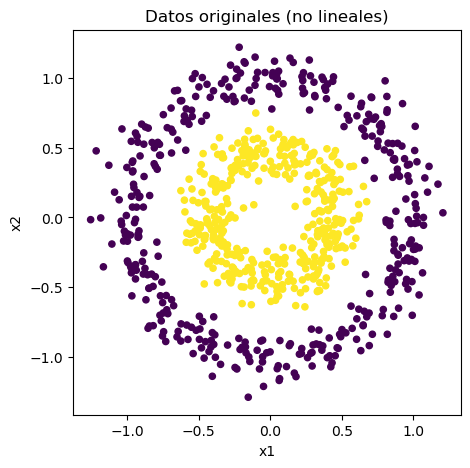

In [2]:
X, y = make_circles(n_samples=800, noise=0.10, factor=0.45, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20)
plt.title("Datos originales (no lineales)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## 2. División en entrenamiento y prueba
En esta sección se divide el conjunto de datos en un conjunto de entrenamiento y otro de prueba. El conjunto de entrenamiento se utiliza para ajustar el modelo, mientras que el conjunto de prueba permite evaluar su capacidad de generalización sobre datos no vistos. 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((600, 2), (200, 2))

## 3. Escalado de variables
El escalado es fundamental en SVM para que los parámetros funcionen correctamente.

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Entrenamiento de modelos SVM
Se entrenan dos modelos: uno con kernel lineal y otro con kernel RBF.

In [ ]:
# C = 1 es el valor por defecto en scikit-learn.
# Funciona bien como referencia.
# Permite mostrar que una SVM lineal no es suficiente en datos no lineales.
# Recordar que C debe de ser potencias de 10 (0, 0.1, 1, 10, 100, ...)
svm_lineal = SVC(kernel="linear", C=1.0, random_state=42)
svm_rbf = SVC(kernel="rbf", C=5.0, gamma=2.0, random_state=42)
# C y gamma se eligen porque:
# producen una frontera claramente no lineal,
# separan bien los círculos,
# sin llegar a un sobreajuste evidente.

svm_lineal.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

SVC(C=5.0, gamma=2.0, random_state=42)

## 5. Evaluación de los modelos
Accuracy es la exactitud, es decir, es la proporción de todas las clasificaciones que fueron correctas, ya sean positivas o negativas. 
El recall (también conocido como exhaustividad o tasa de verdaderos positivos) en Machine Learning es una métrica de clasificación que mide la proporción de casos positivos reales que el modelo identifica correctamente del total existente. Su objetivo es maximizar la detección de casos positivos, siendo crucial cuando minimizar los falsos negativos es vital, como en diagnósticos médico

In [ ]:
pred_lineal = svm_lineal.predict(X_test_scaled)
pred_rbf = svm_rbf.predict(X_test_scaled)

print("=== SVM LINEAL ===")
print("Accuracy:", accuracy_score(y_test, pred_lineal)) #exactitud
print(confusion_matrix(y_test, pred_lineal))
print(classification_report(y_test, pred_lineal))

print("\n=== SVM RBF ===")
print("Accuracy:", accuracy_score(y_test, pred_rbf))
print(confusion_matrix(y_test, pred_rbf))
print(classification_report(y_test, pred_rbf))

=== SVM LINEAL ===
Accuracy: 0.515
[[31 69]
 [28 72]]
              precision    recall  f1-score   support

           0       0.53      0.31      0.39       100
           1       0.51      0.72      0.60       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.49       200
weighted avg       0.52      0.52      0.49       200


=== SVM RBF ===
Accuracy: 1.0
[[100   0]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## 6. Visualización de la frontera de decisión
En esta sección se representa la frontera de decisión aprendida por cada modelo SVM. La visualización permite observar cómo el modelo divide el espacio de características y facilita la comparación entre una SVM lineal y una SVM con kernel RBF en un problema no lineal.

In [7]:
def plot_decision_boundary(model, scaler, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.8, X[:, 0].max() + 0.8
    y_min, y_max = X[:, 1].min() - 0.8, X[:, 1].max() + 0.8

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled).reshape(xx.shape)

    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=18)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

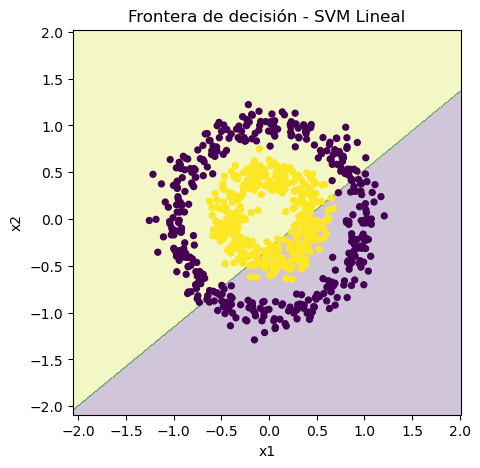

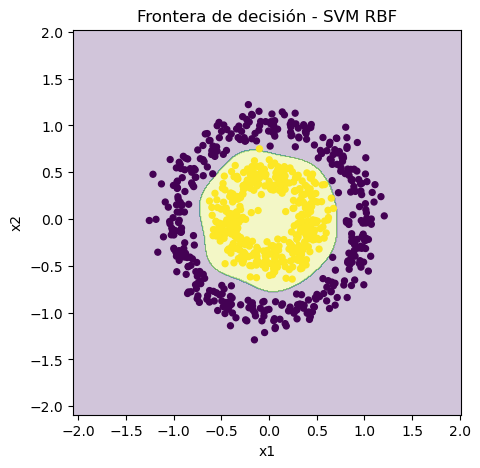

In [8]:
plot_decision_boundary(svm_lineal, scaler, X, y, "Frontera de decisión - SVM Lineal")
plot_decision_boundary(svm_rbf, scaler, X, y, "Frontera de decisión - SVM RBF")

## Preguntas sobre el modelo

1. ¿Por qué una SVM con kernel lineal no es capaz de separar correctamente los datos generados en este ejemplo? Relaciona tu respuesta con la forma de los datos.

Porque con el lineal, es imposible realizar una separación correcta de estos puntos, esto se aprecia en la primera representación, la cual lo divide por una linea, la cual no tiene sentido, a diferencia de RBF

2. Observa la frontera de decisión obtenida con el kernel RBF. ¿Qué diferencia principal aprecias respecto a la frontera generada por la SVM lineal?

La principal diferencia es que el modelo RBF, es capaz de cortar los datos y ajustarse mejor, porque es capaz de representarlo con un "ciruculo" (aunque luego sea un cono en 3D). A difrencia del modelo lineal, que intenta separarlo por una línea.

3. Explica por qué es necesario escalar las variables antes de entrenar una SVM. ¿Qué podría ocurrir si se entrenara el modelo sin realizar el escalado?

Es necesario realizar un escalado, porque ciertas variables con cierto peso, si no se las aplica un escalado influyen negativamente, descompensando el plano creado

4. ¿Qué papel juegan los parámetros *C* y *gamma* en el comportamiento de la SVM con kernel RBF? Describe qué efecto tendría aumentar excesivamente cada uno de ellos.

La importancia del parametro C es controlar el margen máximo (controla la penalización por errores), y el gamma controla el alcance de cada variable. Si aumentamos excesivamente el valor de C, el número de errores bajará, y con gamma, hace que la influencia de cada punto es más local (adapta a patrones específicos)

5. Analiza las matrices de confusión obtenidas para ambos modelos. ¿Qué tipo de errores comete con mayor frecuencia la SVM lineal? ¿Cómo mejora este aspecto la SVM con kernel RBF?

La principal diferencia entre las dos matrices de confusión, es que la líneal tiene una precision baja (falsos positivos), debido a que la resolución no es correcta, por eso ambás diagonales de la matriz de relación salen así, dando lugar a una precision baja.
Sin embargo, el SVM con kernel RBF, hace una matriz perfecta, dejando todos los valores en la diagonal principal, esto indica que recoge y agrupa correctamente los datos.

6. ¿Por qué es importante separar los datos en conjuntos de entrenamiento y prueba? ¿Qué información aporta el conjunto de prueba sobre el modelo entrenado?

Es importante separar los datos de entrenamiento y prueba, porque despues de entrenar el modelo hemos de comprobar si el modelo es capaz de adaptarse a nuevos datos. Es decir, si el modelo tiene overfitting o no.

7. En este ejemplo se ha utilizado el parámetro `stratify=y` en la división de los datos. Explica qué problema podría aparecer si no se utilizara este parámetro.

Si no se usa stratify=y, puede pasar que el split deje proporciones muy distintas de clases en entrenamiento y en prueba (por ejemplo, que una clase quede infra-representada o casi no aparezca en test).

8. Desde un punto de vista práctico, ¿en qué tipo de problemas reales consideras que sería adecuado utilizar una SVM con kernel RBF en lugar de una SVM lineal?

El SVM con kernel RBF se usa normalmente, cuando no se conoce bien la frontera (separación) entre los datos. El lineal la ventaja que tiene es que, como su nombre dice los valores se pueden separar facilmente de forma lineal, se quiere evitar el sobreajuste, y buscando un modelo simple
